In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
sheet='covid_19_dataset-1718175635.xlsx'

In [5]:
covid_19_deaths_raw=pd.read_excel(sheet,sheet_name='covid_19_deaths_v1')
covid_19_deaths_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


### Data-cleaning for covid_19-death_raw

In [6]:
covid_19_deaths_raw['Province/State']=covid_19_deaths_raw['Province/State'].fillna('All Provinces')

In [7]:
covid_19_deaths_raw['Lat']=covid_19_deaths_raw['Lat'].fillna(0)

In [8]:
covid_19_deaths_raw['Long']=covid_19_deaths_raw['Long'].fillna(0)

In [9]:
covid_19_deaths=pd.melt(covid_19_deaths_raw,id_vars=['Province/State','Country/Region', 'Lat', 'Long'],var_name='Date',value_name='Deaths')

In [10]:
covid_19_deaths['Date']=pd.to_datetime(covid_19_deaths['Date'],format="%m/%d/%y",errors='coerce')

In [11]:
covid_19_deaths.info() #structre of this sheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  136344 non-null  object        
 1   Country/Region  136344 non-null  object        
 2   Lat             136344 non-null  float64       
 3   Long            136344 non-null  float64       
 4   Date            136344 non-null  datetime64[ns]
 5   Deaths          136343 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.2+ MB


In [12]:
covid_19_deaths.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Deaths            1
dtype: int64

In [13]:
confirmed_raw=pd.read_excel(sheet,sheet_name='covid_19_confirmed_v1')

### Data_cleaning for confirmed_cases

In [14]:
confirmed_cases=pd.melt(confirmed_raw,id_vars=['Province/State','Country/Region', 'Lat', 'Long'],var_name='Date',value_name='confirmed')

In [15]:
confirmed_cases['Date']=pd.to_datetime(confirmed_cases['Date'],format="%m/%d/%y",errors='coerce')

In [16]:
confirmed_cases['Province/State']=confirmed_cases['Province/State'].fillna('All Provinces')

In [17]:
confirmed_cases['Lat']=confirmed_cases['Lat'].fillna(0)
confirmed_cases['Long']=confirmed_cases['Long'].fillna(0)

In [18]:
confirmed_cases.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
confirmed         0
dtype: int64

In [19]:
recovered_raw=pd.read_excel(sheet,sheet_name='covid_19_recovered_v1')

In [20]:
recovered_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


### Data_cleaning for recoverd_cases

In [21]:
recoverd_cases=pd.melt(recovered_raw,['Province/State','Country/Region', 'Lat', 'Long'],var_name='Date',value_name='recoverd')

In [22]:
recoverd_cases['Province/State']=recoverd_cases['Province/State'].fillna('All Provinces')
recoverd_cases['Lat']=recoverd_cases['Lat'].fillna(0)
recoverd_cases['Long']=recoverd_cases['Long'].fillna(0)

In [23]:
recoverd_cases['Date']=pd.to_datetime(recoverd_cases['Date'],format="%m/%d/%y",errors='coerce')

In [24]:
recoverd_cases.info()  #structre of this sheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128934 entries, 0 to 128933
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  128934 non-null  object        
 1   Country/Region  128934 non-null  object        
 2   Lat             128934 non-null  float64       
 3   Long            128934 non-null  float64       
 4   Date            128934 non-null  datetime64[ns]
 5   recoverd        128933 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.9+ MB


In [25]:
covid_19_deaths['Deaths']=covid_19_deaths['Deaths'].fillna(0)

In [26]:
recoverd_cases['recoverd']=recoverd_cases['recoverd'].fillna(0)

In [27]:
confirmed_cases['confirmed']=confirmed_cases['confirmed'].fillna(0)

In [28]:
covid_19_deaths.head(2)

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0.0


In [29]:
confirmed_cases.info() #overview of this sheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  136344 non-null  object        
 1   Country/Region  136344 non-null  object        
 2   Lat             136344 non-null  float64       
 3   Long            136344 non-null  float64       
 4   Date            136344 non-null  datetime64[ns]
 5   confirmed       136344 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.2+ MB


In [30]:
recoverd_cases['recoverd']=recoverd_cases['recoverd'].astype(int)

In [31]:
recoverd_cases.head(2)

,Province/State,Country/Region,Lat,Long,Date,recoverd
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0


### Grouping individual sheet for more clarity

In [32]:
covid_19_deaths_agg=covid_19_deaths.groupby(['Country/Region','Date'])['Deaths'].sum().reset_index()
covid_19_deaths_agg.head(2)

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-02,0.0
1,Afghanistan,2020-01-03,0.0


In [33]:
confirmed_cases_agg=confirmed_cases.groupby(['Country/Region','Date'])['confirmed'].sum().reset_index()
confirmed_cases_agg.head(2)

,Country/Region,Date,confirmed
0,Afghanistan,2020-01-02,0
1,Afghanistan,2020-01-03,1


In [34]:
recoverd_cases_agg=recoverd_cases.groupby(['Country/Region','Date'])['recoverd'].sum().reset_index()
recoverd_cases_agg.head(2)

,Country/Region,Date,recoverd
0,Afghanistan,2020-01-02,0
1,Afghanistan,2020-01-03,0


### final cleaned version of individual sheets

In [35]:
#covid_19_deaths_agg
#confirmed_cases_agg
#recoverd_cases_agg

### merging over one final sheet

In [36]:
one_overview_df=pd.merge(covid_19_deaths_agg,confirmed_cases_agg,on=['Country/Region','Date'],how='inner')

In [37]:
covid_19_overview_df=pd.merge(one_overview_df,recoverd_cases_agg,on=['Country/Region','Date'],how='inner')

In [38]:
covid_19_overview_df.info() #structre of complete overview sheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95342 entries, 0 to 95341
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  95342 non-null  object        
 1   Date            95342 non-null  datetime64[ns]
 2   Deaths          95342 non-null  float64       
 3   confirmed       95342 non-null  int64         
 4   recoverd        95342 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [39]:
#confirmed cases for over top countries

In [40]:
confirmed_cases_ntop=confirmed_cases_agg.groupby(['Country/Region'])['confirmed'].sum().reset_index().sort_values(by='confirmed',ascending=False)
confirmed_cases_ntop

,Country/Region,confirmed
179,US,6047736004
79,India,3226953590
23,Brazil,2653620509
143,Russia,930548859
62,France,855026731
...,...,...
112,Marshall Islands,804
148,Samoa,481
186,Vanuatu,406
116,Micronesia,129


In [41]:
confirmed_cases_over_top_countries=covid_19_overview_df.groupby(['Country/Region'])['confirmed'].sum().reset_index().sort_values(by='confirmed',ascending=False)
confirmed_cases_over_top_countries

,Country/Region,confirmed
179,US,6047736004
79,India,3226953590
23,Brazil,2653620509
143,Russia,930548859
62,France,855026731
...,...,...
112,Marshall Islands,804
148,Samoa,481
186,Vanuatu,406
116,Micronesia,129


In [42]:
confirmed_cases_ntop_Dates=confirmed_cases_agg.groupby(['Country/Region'])['Date'].max()
confirmed_cases_ntop_Dates

Country/Region
Afghanistan          2021-12-05
Albania              2021-12-05
Algeria              2021-12-05
Andorra              2021-12-05
Angola               2021-12-05
                        ...    
Vietnam              2021-12-05
West Bank and Gaza   2021-12-05
Yemen                2021-12-05
Zambia               2021-12-05
Zimbabwe             2021-12-05
Name: Date, Length: 193, dtype: datetime64[ns]

In [43]:
confirmed_cases_ntop_values=confirmed_cases_agg[confirmed_cases_agg['Date']== '2021-12-05'].nlargest(5,'confirmed')
confirmed_cases_ntop_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 88919 to 88425
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  5 non-null      object        
 1   Date            5 non-null      datetime64[ns]
 2   confirmed       5 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 160.0+ bytes


In [44]:
top_countries=confirmed_cases_ntop_values['Country/Region'].to_list()
top_countries

['US', 'India', 'Brazil', 'France', 'Turkey']

In [45]:
pip install 

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sb

['US' 'India' 'Brazil' 'France' 'Turkey']


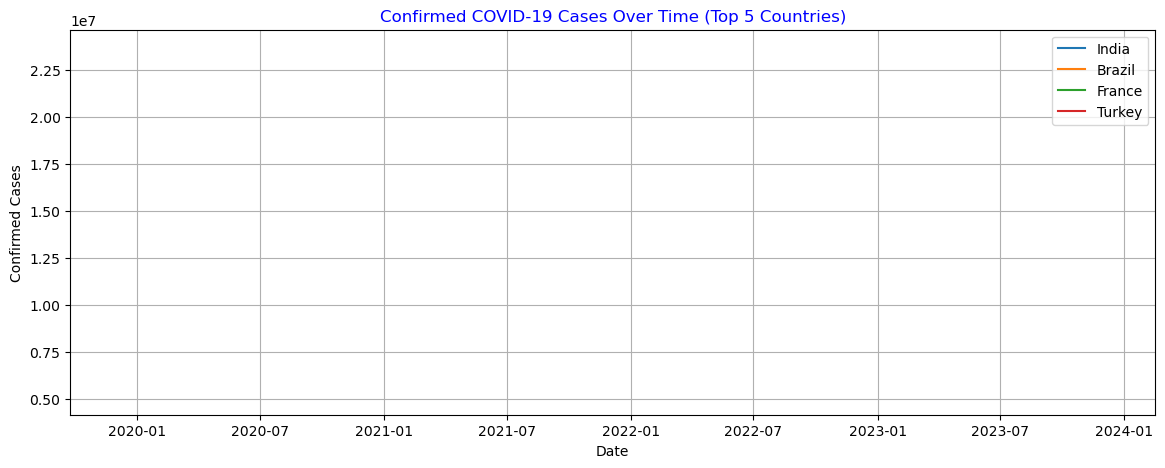

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date column is datetime
confirmed_cases_ntop_values['Date'] = pd.to_datetime(confirmed_cases_ntop_values['Date'])

# Inspect available country names
print(confirmed_cases_ntop_values['Country/Region'].unique())

# Adjust country names to match dataset exactly
top_countries = ['United States', 'India', 'Brazil', 'France', 'Turkey']

plt.figure(figsize=(14,5))

for country in top_countries:
    country_df = confirmed_cases_ntop_values[
        confirmed_cases_ntop_values['Country/Region'] == country
    ].sort_values('Date')
    
    if not country_df.empty:
        plt.plot(country_df['Date'], country_df['confirmed'], label=country)

plt.title('Confirmed COVID-19 Cases Over Time (Top 5 Countries)', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
china_df=covid_19_overview_df[covid_19_overview_df['Country/Region']=='China'].sort_values(by='Date',ascending=False)
china_df

,Country/Region,Date,Deaths,confirmed,recoverd
18277,China,2021-12-05,4846.0,102671,97435
18276,China,2021-12-04,4843.0,102078,96768
18275,China,2021-12-03,4839.0,101292,95972
18274,China,2021-12-02,4828.0,100559,94536
18273,China,2021-12-01,4794.0,97095,90857
...,...,...,...,...,...
17788,China,2020-01-06,4638.0,84154,79398
17787,China,2020-01-05,4637.0,83959,78573
17786,China,2020-01-04,3316.0,82361,76405
17785,China,2020-01-03,2872.0,79932,42162


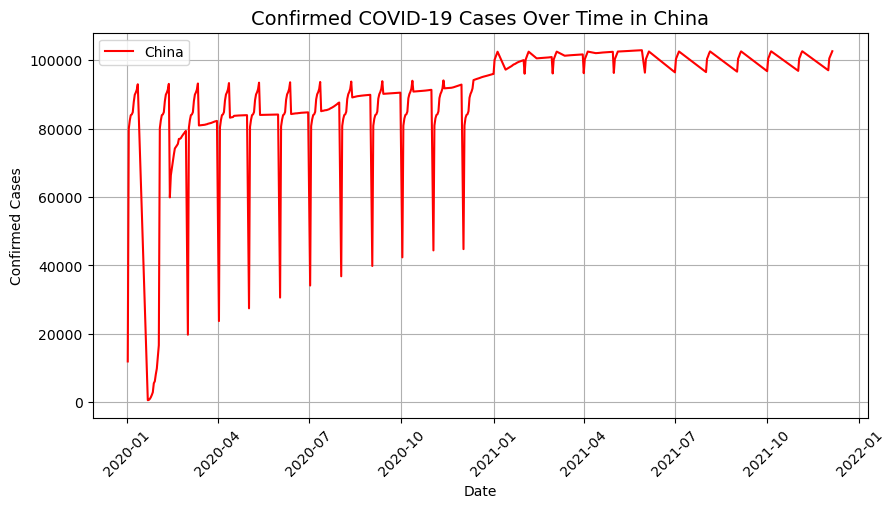

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date column is datetime
china_df['Date'] = pd.to_datetime(china_df['Date'])

# Sort by Date ascending for proper line plot
china_df = china_df.sort_values('Date')

plt.figure(figsize=(10,5))
plt.plot(china_df['Date'], china_df['confirmed'], color='red', label='China')

plt.title('Confirmed COVID-19 Cases Over Time in China', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#Better management between Canada nd Australia

In [52]:
comparision=covid_19_overview_df[
    (covid_19_overview_df['Country/Region'] .isin(['Canada', 'Australia'])) &
    (covid_19_overview_df['Date'] == '2020-12-31')
]
comparision
comparision['Recovery rate']=(comparision['recoverd']/comparision['confirmed']*100).round(2)
comparision

C:\Users\ruthu\AppData\Local\Temp\ipykernel_21224\1550564089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparision['Recovery rate']=(comparision['recoverd']/comparision['confirmed']*100).round(2)


,Country/Region,Date,Deaths,confirmed,recoverd,Recovery rate
4296,Australia,2020-12-31,909.0,28425,22565,79.38
16152,Canada,2020-12-31,15762.0,584409,493638,84.47


C:\Users\ruthu\AppData\Local\Temp\ipykernel_21224\2973188479.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


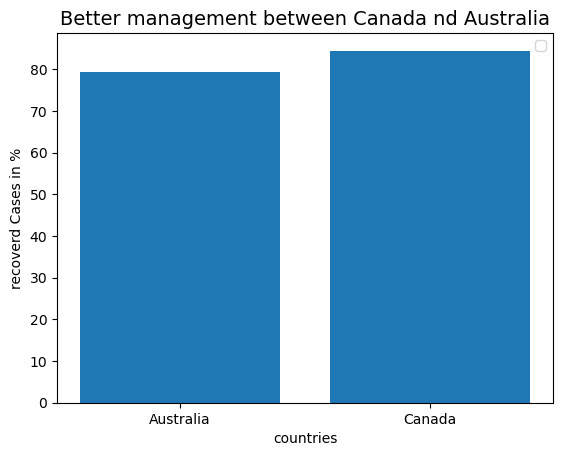

In [53]:
plt.bar(comparision['Country/Region'], comparision['Recovery rate'])
plt.title('Better management between Canada nd Australia', fontsize=14)
plt.xlabel('countries')
plt.ylabel('recoverd Cases in %')
plt.legend()
plt.show()

In [54]:
canada_death_df=covid_19_deaths[covid_19_deaths['Country/Region']=='Canada']
canada_death_df

,Province/State,Country/Region,Lat,Long,Date,Deaths
39,Alberta,Canada,53.9333,-116.5765,2020-01-22,0.0
40,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0.0
41,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0.0
42,Grand Princess,Canada,0.0000,0.0000,2020-01-22,0.0
43,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0.0
...,...,...,...,...,...,...
136118,Prince Edward Island,Canada,46.5107,-63.4168,2021-05-29,0.0
136119,Quebec,Canada,52.9399,-73.5491,2021-05-29,11125.0
136120,Repatriated Travellers,Canada,0.0000,0.0000,2021-05-29,0.0
136121,Saskatchewan,Canada,52.9399,-106.4509,2021-05-29,537.0


In [55]:
canada_confirmed_df=confirmed_cases[confirmed_cases['Country/Region']=='Canada']
canada_confirmed_df

,Province/State,Country/Region,Lat,Long,Date,confirmed
39,Alberta,Canada,53.9333,-116.5765,2020-01-22,0
40,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0
41,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0
42,Grand Princess,Canada,0.0000,0.0000,2020-01-22,0
43,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0
...,...,...,...,...,...,...
136118,Prince Edward Island,Canada,46.5107,-63.4168,2021-05-29,200
136119,Quebec,Canada,52.9399,-73.5491,2021-05-29,369728
136120,Repatriated Travellers,Canada,0.0000,0.0000,2021-05-29,13
136121,Saskatchewan,Canada,52.9399,-106.4509,2021-05-29,46464


In [56]:
canada_df=pd.merge(canada_death_df,canada_confirmed_df,on =['Date','Province/State'],how = 'inner')
canada_df = canada_df.drop(['Country/Region_y','Lat_y','Long_y'], axis=1)
canada_df

,Province/State,Country/Region_x,Lat_x,Long_x,Date,Deaths,confirmed
0,Alberta,Canada,53.9333,-116.5765,2020-01-22,0.0,0
1,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0.0,0
2,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0.0,0
3,Grand Princess,Canada,0.0000,0.0000,2020-01-22,0.0,0
4,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0.0,0
...,...,...,...,...,...,...,...
7899,Prince Edward Island,Canada,46.5107,-63.4168,2021-05-29,0.0,200
7900,Quebec,Canada,52.9399,-73.5491,2021-05-29,11125.0,369728
7901,Repatriated Travellers,Canada,0.0000,0.0000,2021-05-29,0.0,13
7902,Saskatchewan,Canada,52.9399,-106.4509,2021-05-29,537.0,46464


#Death distrbution in canada

In [57]:
canada_provinces_death_disturbution=canada_df.groupby('Province/State')['Deaths'].sum().reset_index()
canada_provinces_confirmed_disturbution=canada_df.groupby('Province/State')['confirmed'].sum().reset_index()
canada_provinces_disturbution=pd.merge(canada_provinces_death_disturbution,canada_provinces_confirmed_disturbution,on='Province/State',how='inner')
canada_provinces_disturbution['Deathrates']=(canada_provinces_disturbution['Deaths']/canada_provinces_disturbution['confirmed']*100).round(2)
canada_provinces_disturbution.head(5)

,Province/State,Deaths,confirmed,Deathrates
0,Alberta,351648.0,28903273,1.22
1,British Columbia,274257.0,17204548,1.59
2,Diamond Princess,434.0,32,1356.25
3,Grand Princess,0.0,5696,0.00
4,Manitoba,158177.0,6311512,2.51


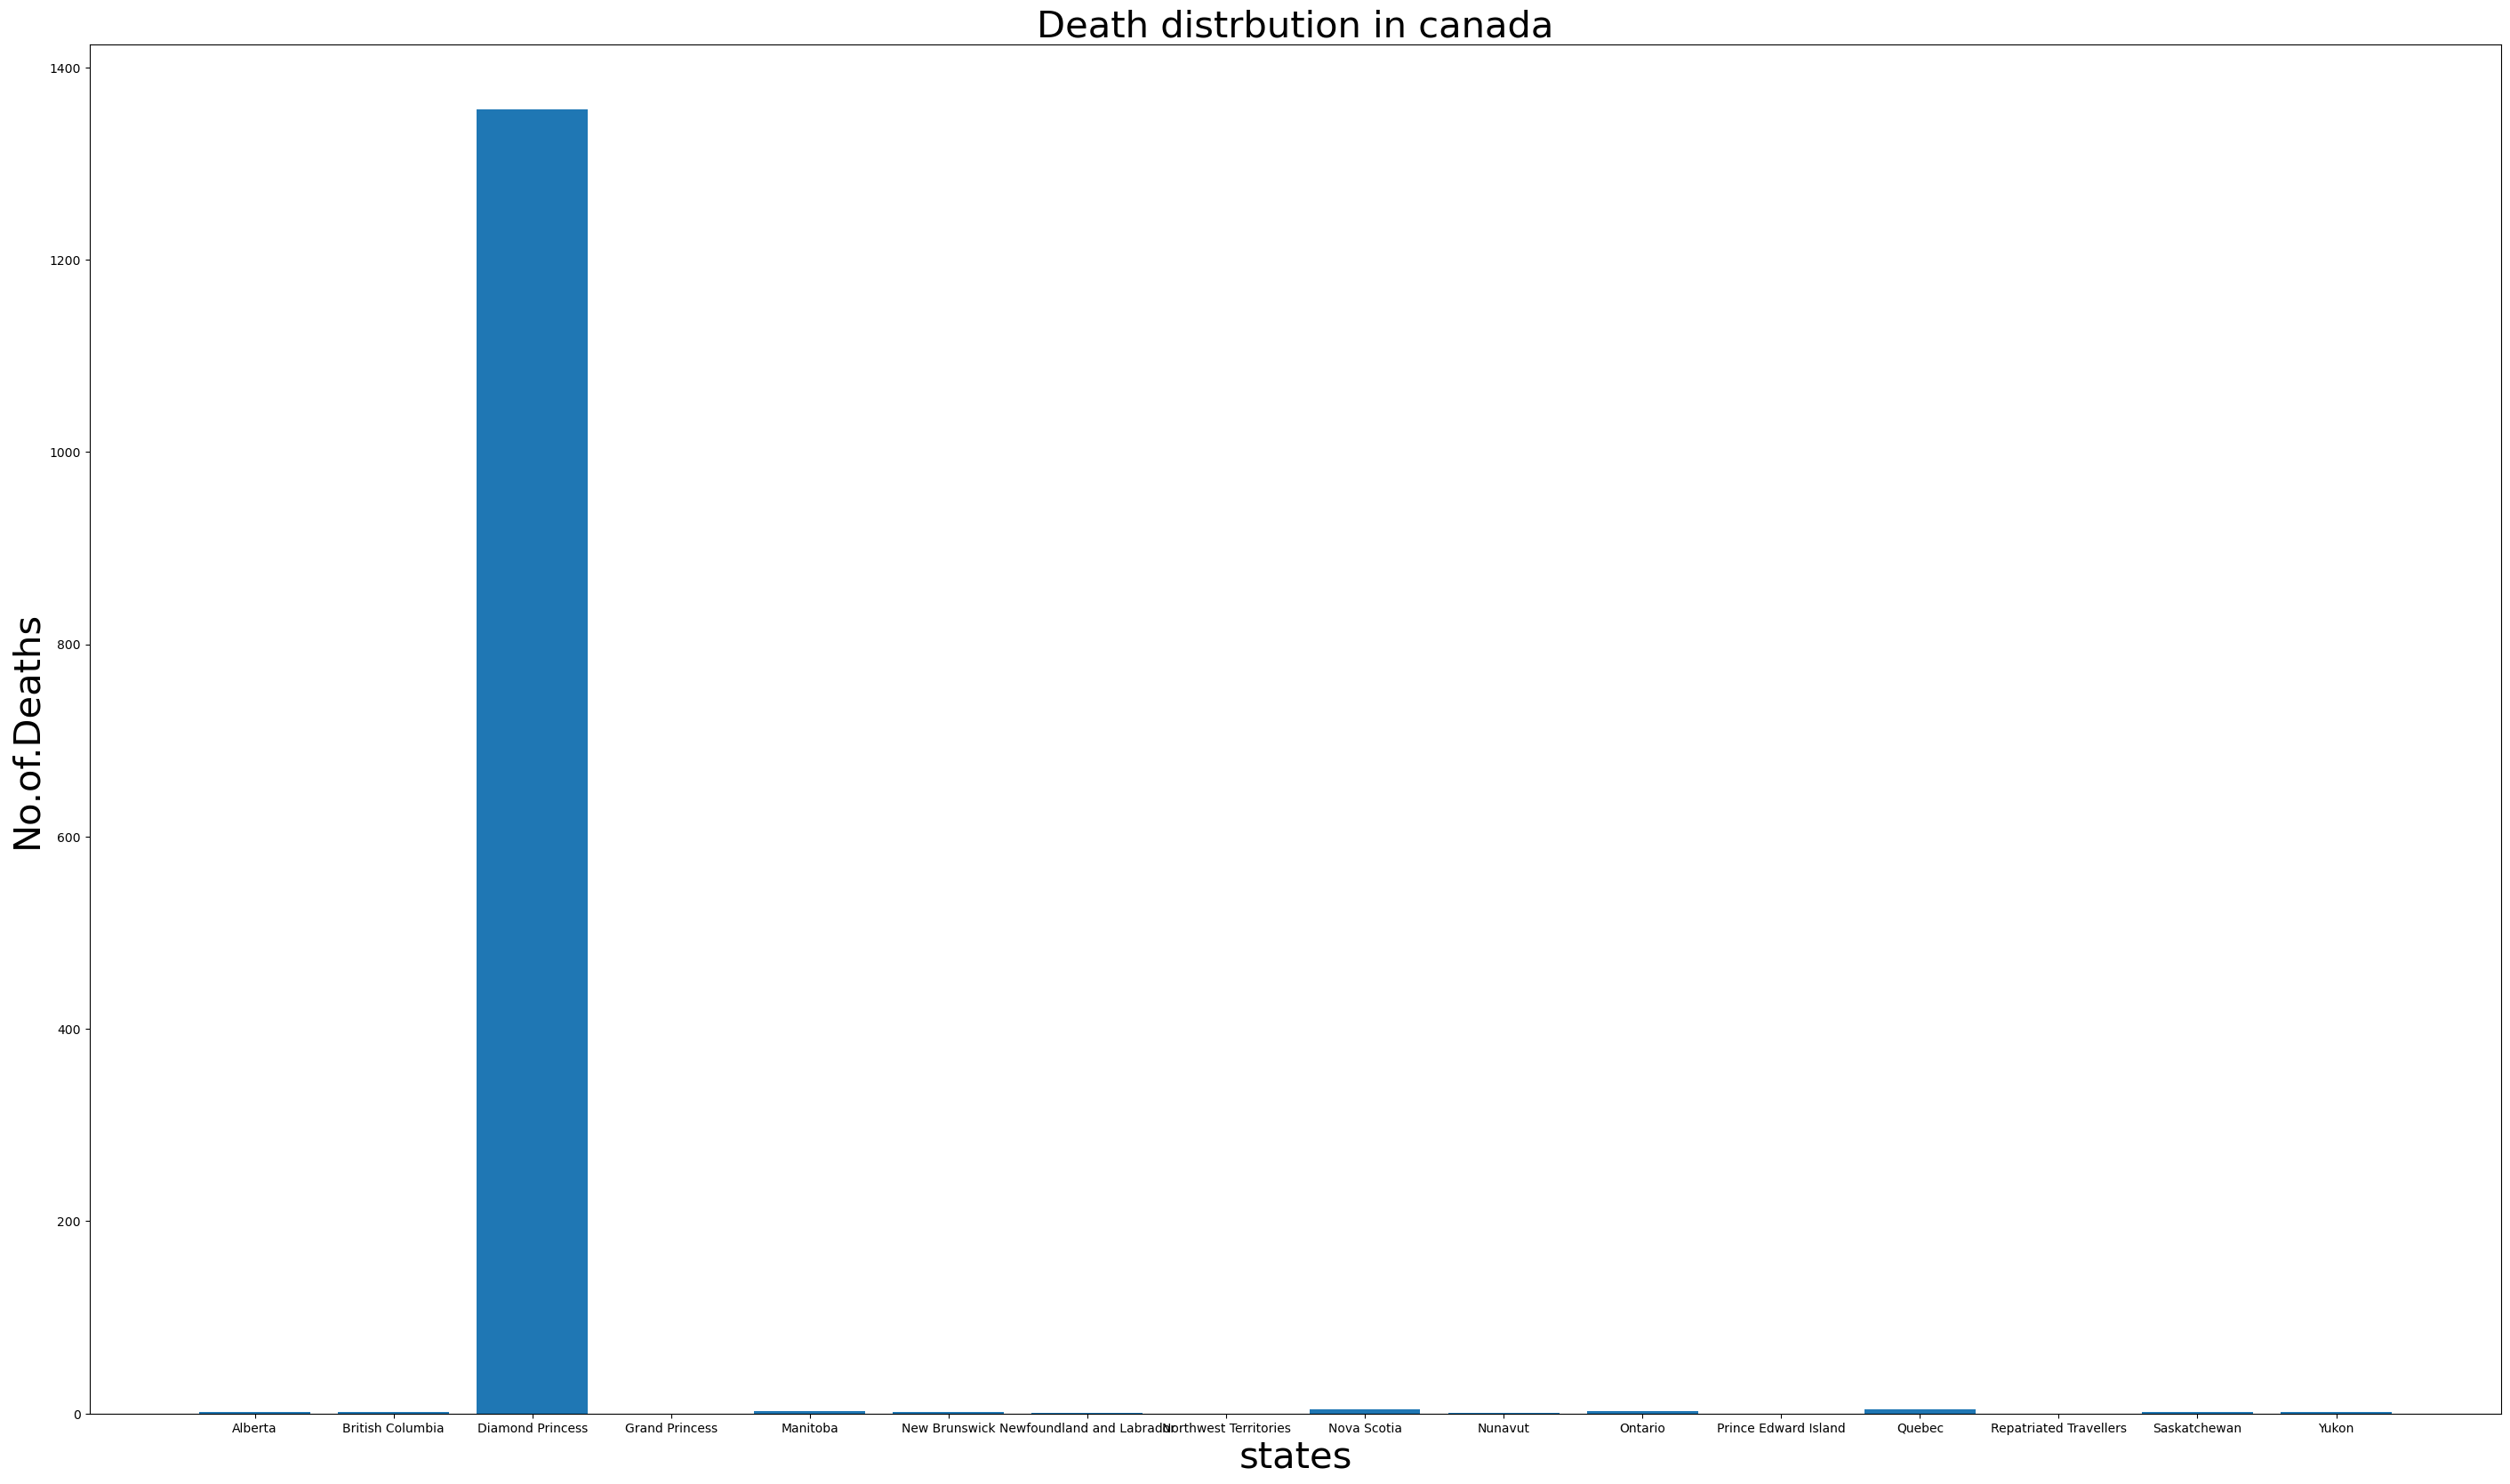

In [58]:
plt.figure(figsize=(35,20))
plt.bar(canada_provinces_disturbution['Province/State'],canada_provinces_disturbution['Deathrates'])
plt.title('Death distrbution in canada',size=30)
plt.xlabel('states',size=30)
plt.ylabel('No.of.Deaths',size=30)
plt.show()

In [59]:
confirmed_cases_agg.head(5)

,Country/Region,Date,confirmed
0,Afghanistan,2020-01-02,0
1,Afghanistan,2020-01-03,1
2,Afghanistan,2020-01-04,197
3,Afghanistan,2020-01-05,2291
4,Afghanistan,2020-01-06,15753


In [60]:
#ANALYZE THE PEAK NO.OF DAILY CASES OVER GERMANY,ITALY,FRANCE

In [61]:
targetted_countries=['Germany','France','Italy']

In [62]:
targetted_countries_cn_df=confirmed_cases_agg[confirmed_cases_agg['Country/Region'].isin(targetted_countries)]
targetted_countries_cn_df

,Country/Region,Date,confirmed
30628,France,2020-01-02,6
30629,France,2020-01-03,130
30630,France,2020-01-04,57122
30631,France,2020-01-05,169387
30632,France,2020-01-06,191382
...,...,...,...
42479,Italy,2021-12-01,2303263
42480,Italy,2021-12-02,2697296
42481,Italy,2021-12-03,3175807
42482,Italy,2021-12-04,3779594


In [63]:
targetted_countries_cn_df['lag']=targetted_countries_cn_df.groupby('Country/Region')['confirmed'].shift(1)
targetted_countries_cn_df.head()

C:\Users\ruthu\AppData\Local\Temp\ipykernel_21224\3067327007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetted_countries_cn_df['lag']=targetted_countries_cn_df.groupby('Country/Region')['confirmed'].shift(1)


,Country/Region,Date,confirmed,lag
30628,France,2020-01-02,6,NaN
30629,France,2020-01-03,130,6.0
30630,France,2020-01-04,57122,130.0
30631,France,2020-01-05,169387,57122.0
30632,France,2020-01-06,191382,169387.0


In [64]:
targetted_countries_cn_df['lag']=targetted_countries_cn_df['lag'].fillna(0)

C:\Users\ruthu\AppData\Local\Temp\ipykernel_21224\1557289639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetted_countries_cn_df['lag']=targetted_countries_cn_df['lag'].fillna(0)


In [65]:
targetted_countries_cn_df.head()

,Country/Region,Date,confirmed,lag
30628,France,2020-01-02,6,0.0
30629,France,2020-01-03,130,6.0
30630,France,2020-01-04,57122,130.0
30631,France,2020-01-05,169387,57122.0
30632,France,2020-01-06,191382,169387.0


In [66]:
targetted_countries_cn_df['daily']=targetted_countries_cn_df['confirmed']-targetted_countries_cn_df['lag']
targetted_countries_cn_df

C:\Users\ruthu\AppData\Local\Temp\ipykernel_21224\1795346783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetted_countries_cn_df['daily']=targetted_countries_cn_df['confirmed']-targetted_countries_cn_df['lag']


,Country/Region,Date,confirmed,lag,daily
30628,France,2020-01-02,6,0.0,6.0
30629,France,2020-01-03,130,6.0,124.0
30630,France,2020-01-04,57122,130.0,56992.0
30631,France,2020-01-05,169387,57122.0,112265.0
30632,France,2020-01-06,191382,169387.0,21995.0
...,...,...,...,...,...
42479,Italy,2021-12-01,2303263,4123230.0,-1819967.0
42480,Italy,2021-12-02,2697296,2303263.0,394033.0
42481,Italy,2021-12-03,3175807,2697296.0,478511.0
42482,Italy,2021-12-04,3779594,3175807.0,603787.0


In [67]:
targetted_countries_cn_df['daily'].max()

1163615.0

In [68]:
targetted_countries_cn_df[targetted_countries_cn_df['daily']==1163615.0]

,Country/Region,Date,confirmed,lag,daily
30952,France,2020-12-11,1950205,786590.0,1163615.0


In [69]:
#No.of deaths per the country upto current date

In [70]:
covid_19_deaths_agg

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-02,0.0
1,Afghanistan,2020-01-03,0.0
2,Afghanistan,2020-01-04,4.0
3,Afghanistan,2020-01-05,68.0
4,Afghanistan,2020-01-06,266.0
...,...,...,...
95337,Zimbabwe,2021-12-01,551.0
95338,Zimbabwe,2021-12-02,1393.0
95339,Zimbabwe,2021-12-03,1496.0
95340,Zimbabwe,2021-12-04,1542.0


In [71]:
total_deaths = covid_19_deaths_agg.groupby('Country/Region')['Deaths'].max().reset_index()
total_deaths.sort_values(by='Deaths',ascending=False)

,Country/Region,Deaths
179,US,594306.0
23,Brazil,461057.0
79,India,325972.0
115,Mexico,223455.0
183,United Kingdom,128037.0
...,...,...
91,Kiribati,0.0
116,Micronesia,0.0
159,Solomon Islands,0.0
148,Samoa,0.0


In [72]:
#top 5 countries with highest daily average deaths

In [73]:
deaths_df_by_date=covid_19_deaths_agg.groupby(['Country/Region','Date'])['Deaths'].sum().reset_index()
deaths_df_by_date

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-02,0.0
1,Afghanistan,2020-01-03,0.0
2,Afghanistan,2020-01-04,4.0
3,Afghanistan,2020-01-05,68.0
4,Afghanistan,2020-01-06,266.0
...,...,...,...
95337,Zimbabwe,2021-12-01,551.0
95338,Zimbabwe,2021-12-02,1393.0
95339,Zimbabwe,2021-12-03,1496.0
95340,Zimbabwe,2021-12-04,1542.0


In [74]:
deaths_df_by_date['Daily_deaths']=deaths_df_by_date.groupby('Country/Region')['Deaths'].diff().fillna(0)

In [75]:
deaths_df_by_date

,Country/Region,Date,Deaths,Daily_deaths
0,Afghanistan,2020-01-02,0.0,0.0
1,Afghanistan,2020-01-03,0.0,0.0
2,Afghanistan,2020-01-04,4.0,4.0
3,Afghanistan,2020-01-05,68.0,64.0
4,Afghanistan,2020-01-06,266.0,198.0
...,...,...,...,...
95337,Zimbabwe,2021-12-01,551.0,-1028.0
95338,Zimbabwe,2021-12-02,1393.0,842.0
95339,Zimbabwe,2021-12-03,1496.0,103.0
95340,Zimbabwe,2021-12-04,1542.0,46.0


In [76]:
avg_daily=deaths_df_by_date.groupby('Country/Region')['Daily_deaths'].mean().reset_index().round(2)
avg_daily.sort_values(by='Daily_deaths',ascending=False).head()

,Country/Region,Daily_deaths
179,US,1182.07
23,Brazil,866.47
79,India,522.91
115,Mexico,444.51
183,United Kingdom,258.91


In [77]:
#total deaths evolved over time in united states

In [78]:
us_death_over_time=deaths_df_by_date[deaths_df_by_date['Country/Region']=='US'].tail(4)
us_death_over_time

,Country/Region,Date,Deaths,Daily_deaths
88916,US,2021-12-02,484494.0,96493.0
88917,US,2021-12-03,534234.0,49740.0
88918,US,2021-12-04,563103.0,28869.0
88919,US,2021-12-05,583942.0,20839.0


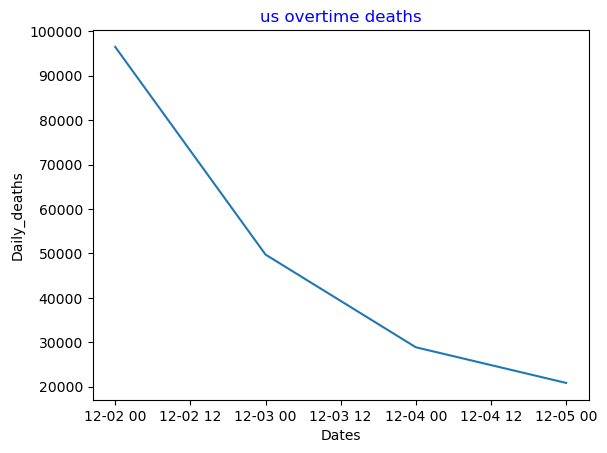

In [79]:
plt.plot(us_death_over_time['Date'],us_death_over_time['Daily_deaths'])
plt.title('us overtime deaths',color = 'blue')
plt.xlabel('Dates')
plt.ylabel('Daily_deaths')
plt.show()

In [80]:
#monthly wise data of confirmed cases nd deaths nd recoveries

In [81]:
covid_19_overview_df.head()

,Country/Region,Date,Deaths,confirmed,recoverd
0,Afghanistan,2020-01-02,0.0,0,0
1,Afghanistan,2020-01-03,0.0,1,0
2,Afghanistan,2020-01-04,4.0,197,5
3,Afghanistan,2020-01-05,68.0,2291,310
4,Afghanistan,2020-01-06,266.0,15753,1428


In [82]:
dailysheet=covid_19_overview_df.copy()

In [86]:
dailysheet['Daily_deaths']=dailysheet.groupby('Country/Region')['Deaths'].diff().fillna(0)
dailysheet['Daily_confirmed']=dailysheet.groupby('Country/Region')['confirmed'].diff().fillna(0)
dailysheet['Daily_recoverd']=dailysheet.groupby('Country/Region')['recoverd'].diff().fillna(0)

In [87]:
dailysheet

,Country/Region,Date,Deaths,confirmed,recoverd,Daily_deaths,Daily_confirmed,Daily_recoverd
0,Afghanistan,2020-01-02,0.0,0,0,0.0,0.0,0.0
1,Afghanistan,2020-01-03,0.0,1,0,0.0,1.0,0.0
2,Afghanistan,2020-01-04,4.0,197,5,4.0,196.0,5.0
3,Afghanistan,2020-01-05,68.0,2291,310,64.0,2094.0,305.0
4,Afghanistan,2020-01-06,266.0,15753,1428,198.0,13462.0,1118.0
...,...,...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,551.0,23239,13396,-1028.0,-15209.0,-22825.0
95338,Zimbabwe,2021-12-02,1393.0,35045,29959,842.0,11806.0,16563.0
95339,Zimbabwe,2021-12-03,1496.0,36423,33996,103.0,1378.0,4037.0
95340,Zimbabwe,2021-12-04,1542.0,37307,34901,46.0,884.0,905.0


In [88]:
monthly_df=dailysheet.copy()

In [89]:
monthly_df['Month_year']=monthly_df['Date'].dt.to_period('M')

In [90]:
monthly_df

,Country/Region,Date,Deaths,confirmed,recoverd,Daily_deaths,Daily_confirmed,Daily_recoverd,Month_year
0,Afghanistan,2020-01-02,0.0,0,0,0.0,0.0,0.0,2020-01
1,Afghanistan,2020-01-03,0.0,1,0,0.0,1.0,0.0,2020-01
2,Afghanistan,2020-01-04,4.0,197,5,4.0,196.0,5.0,2020-01
3,Afghanistan,2020-01-05,68.0,2291,310,64.0,2094.0,305.0,2020-01
4,Afghanistan,2020-01-06,266.0,15753,1428,198.0,13462.0,1118.0,2020-01
...,...,...,...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,551.0,23239,13396,-1028.0,-15209.0,-22825.0,2021-12
95338,Zimbabwe,2021-12-02,1393.0,35045,29959,842.0,11806.0,16563.0,2021-12
95339,Zimbabwe,2021-12-03,1496.0,36423,33996,103.0,1378.0,4037.0,2021-12
95340,Zimbabwe,2021-12-04,1542.0,37307,34901,46.0,884.0,905.0,2021-12


In [92]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95342 entries, 0 to 95341
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country/Region   95342 non-null  object        
 1   Date             95342 non-null  datetime64[ns]
 2   Deaths           95342 non-null  float64       
 3   confirmed        95342 non-null  int64         
 4   recoverd         95342 non-null  int64         
 5   Daily_deaths     95342 non-null  float64       
 6   Daily_confirmed  95342 non-null  float64       
 7   Daily_recoverd   95342 non-null  float64       
 8   Month_year       95342 non-null  period[M]     
dtypes: datetime64[ns](1), float64(4), int64(2), object(1), period[M](1)
memory usage: 6.5+ MB


In [99]:
monthly_data=(monthly_df.groupby(['Country/Region','Month_year']))[['Daily_deaths','Daily_confirmed','Daily_recoverd']].sum().reset_index()
monthly_data

,Country/Region,Month_year,Daily_deaths,Daily_confirmed,Daily_recoverd
0,Afghanistan,2020-01,0.0,0.0,0.0
1,Afghanistan,2020-02,0.0,1.0,0.0
2,Afghanistan,2020-03,4.0,174.0,5.0
3,Afghanistan,2020-04,60.0,1952.0,255.0
4,Afghanistan,2020-05,194.0,13081.0,1068.0
...,...,...,...,...,...
4627,Zimbabwe,2021-08,0.0,11.0,11.0
4628,Zimbabwe,2021-09,0.0,5.0,11.0
4629,Zimbabwe,2021-10,0.0,14.0,145.0
4630,Zimbabwe,2021-11,3.0,15.0,13.0


In [ ]:
#Monthly wise data for us,italy,Brazil

In [107]:
monthly_data[monthly_data['Country/Region'].isin(['US','Italy','Brazil'])]

,Country/Region,Month_year,Daily_deaths,Daily_confirmed,Daily_recoverd
552,Brazil,2020-01,0,0.0,0.0
553,Brazil,2020-02,0,2.0,0.0
554,Brazil,2020-03,201,5715.0,127.0
555,Brazil,2020-04,5805,81470.0,35808.0
556,Brazil,2020-05,23308,427662.0,170620.0
...,...,...,...,...,...
4315,US,2021-08,617,34493.0,0.0
4316,US,2021-09,242,21392.0,0.0
4317,US,2021-10,401,36898.0,0.0
4318,US,2021-11,677,33651.0,0.0


In [114]:
covid_19_overview_df

,Country/Region,Date,Deaths,confirmed,recoverd
0,Afghanistan,2020-01-02,0.0,0,0
1,Afghanistan,2020-01-03,0.0,1,0
2,Afghanistan,2020-01-04,4.0,197,5
3,Afghanistan,2020-01-05,68.0,2291,310
4,Afghanistan,2020-01-06,266.0,15753,1428
...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,551.0,23239,13396
95338,Zimbabwe,2021-12-02,1393.0,35045,29959
95339,Zimbabwe,2021-12-03,1496.0,36423,33996
95340,Zimbabwe,2021-12-04,1542.0,37307,34901


In [ ]:
#yearly_wise covid data

In [113]:
yearly_df=covid_19_overview_df.copy()

In [117]:
yearly_df['year']=yearly_df['Date'].dt.to_period('Y')

In [118]:
yearly_df

,Country/Region,Date,Deaths,confirmed,recoverd,year
0,Afghanistan,2020-01-02,0.0,0,0,2020
1,Afghanistan,2020-01-03,0.0,1,0,2020
2,Afghanistan,2020-01-04,4.0,197,5,2020
3,Afghanistan,2020-01-05,68.0,2291,310,2020
4,Afghanistan,2020-01-06,266.0,15753,1428,2020
...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,551.0,23239,13396,2021
95338,Zimbabwe,2021-12-02,1393.0,35045,29959,2021
95339,Zimbabwe,2021-12-03,1496.0,36423,33996,2021
95340,Zimbabwe,2021-12-04,1542.0,37307,34901,2021


In [119]:
yearly_data=(yearly_df.groupby(['Country/Region','year'])[['Deaths','confirmed','recoverd']].sum().reset_index())

In [120]:
yearly_data

,Country/Region,year,Deaths,confirmed,recoverd
0,Afghanistan,2020,297323.0,8485542,5998314
1,Afghanistan,2021,371752.0,8540900,7466085
2,Albania,2020,88375.0,3727544,1999772
3,Albania,2021,287580.0,16041325,11945484
4,Algeria,2020,377422.0,10583375,7142836
...,...,...,...,...,...
381,Yemen,2021,128669.0,579760,285965
382,Zambia,2020,53042.0,2433883,2229469
383,Zambia,2021,152948.0,11060070,10396157
384,Zimbabwe,2020,36683.0,1336283,1055694


In [129]:
yearly_data['Deathrate']=(yearly_data['Deaths']/yearly_data['confirmed']*100).round(2)

In [130]:
yearly_data

,Country/Region,year,Deaths,confirmed,recoverd,Deathrate
0,Afghanistan,2020,297323.0,8485542,5998314,3.50
1,Afghanistan,2021,371752.0,8540900,7466085,4.35
2,Albania,2020,88375.0,3727544,1999772,2.37
3,Albania,2021,287580.0,16041325,11945484,1.79
4,Algeria,2020,377422.0,10583375,7142836,3.57
...,...,...,...,...,...,...
381,Yemen,2021,128669.0,579760,285965,22.19
382,Zambia,2020,53042.0,2433883,2229469,2.18
383,Zambia,2021,152948.0,11060070,10396157,1.38
384,Zimbabwe,2020,36683.0,1336283,1055694,2.75


In [137]:
top_5_deathrate=yearly_data[yearly_data['year']=='2020'].nlargest(5,'Deathrate')
top_5_deathrate

,Country/Region,year,Deaths,confirmed,recoverd,Deathrate
380,Yemen,2020,108944.0,382306,220558,28.50
210,MS Zaandam,2020,550.0,2483,203,22.15
230,Mexico,2020,15017707.0,149022213,117649447,10.08
104,Ecuador,2020,2063529.0,28245590,21698188,7.31
68,Chad,2020,19635.0,277903,235862,7.07


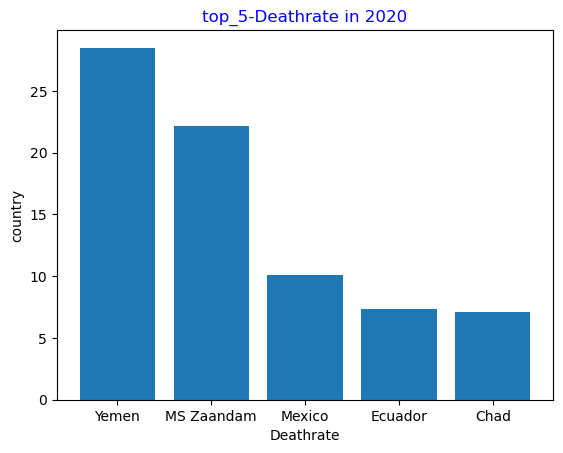

In [145]:
plt.bar(top_5_deathrate['Country/Region'],top_5_deathrate['Deathrate'])
plt.title('top_5-Deathrate in 2020',color='blue')
plt.xlabel('Deathrate')
plt.ylabel('country')
plt.show()

In [ ]:
#south_africa_data

In [146]:
dailysheet.head()

,Country/Region,Date,Deaths,confirmed,recoverd,Daily_deaths,Daily_confirmed,Daily_recoverd
0,Afghanistan,2020-01-02,0.0,0,0,0.0,0.0,0.0
1,Afghanistan,2020-01-03,0.0,1,0,0.0,1.0,0.0
2,Afghanistan,2020-01-04,4.0,197,5,4.0,196.0,5.0
3,Afghanistan,2020-01-05,68.0,2291,310,64.0,2094.0,305.0
4,Afghanistan,2020-01-06,266.0,15753,1428,198.0,13462.0,1118.0


In [149]:
country_wise=dailysheet.groupby('Country/Region')[['Daily_deaths','Daily_confirmed','Daily_recoverd']].sum().reset_index()

In [152]:
country_wise[country_wise['Country/Region']=='South Africa']

,Country/Region,Daily_deaths,Daily_confirmed,Daily_recoverd
161,South Africa,54968.0,1602031.0,1519734.0
